In [3]:
from __future__ import division
%pylab inline
from scipy import stats
from angles import r2d, r2arcs, d2arcs, arcs2r
def arcm2r(theta):
    return arcs2r(theta*60)
import seaborn as sns;sns.set_style('darkgrid')
import lsst.sims.maf.stackers as stackers
import treecorr as tr
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import random
from collections import defaultdict
import treecorr
from itertools import chain
sns.set_context('poster',font_scale=1.4)
sns.set_palette('colorblind')

Populating the interactive namespace from numpy and matplotlib


/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
ls /global/cscratch1/sd/husni/OpsimRuns/

alt_sched.db       colossus_2667.npy                   minion_1012_sqlite.db
baseline2018a.db   feature_baseline.npy                minion_1016_sqlite.db
baseline2018a.npy  feature_baseline_update_10yrsv2.db  mothra_2045.db
colossus_2664.db   feature_baseline_y1.npy             mothra_2045.npy
colossus_2664.npy  kraken_2026.db                      pontus_2002.db
colossus_2665.db   kraken_2026.npy                     pontus_2002.npy
colossus_2665.npy  kraken_2035.db                      pontus_2489.db
colossus_2667.db   kraken_2035.npy                     pontus_2489.npy


In [5]:
ls newnpys/

ALT_SchedY1.npy                    kraken_2026Y10.npy
ALT_SchedY10.npy                   kraken_2035Y1.npy
baseline2018aY1.npy                kraken_2035Y10.npy
baseline2018aY10.npy               mothra_2045Y1.npy
colossus_2664Y1.npy                mothra_2045Y10.npy
colossus_2664Y10.npy               pontus_2002Y1.npy
colossus_2665Y1.npy                pontus_2002Y10.npy
colossus_2665Y10.npy               pontus_2489Y1.npy
colossus_2667Y1.npy                pontus_2489Y10.npy
colossus_2667Y10.npy               random_horizontal_y10_delta_xips.npy
fb_y10_delta_xips.npy              random_horizontal_y1_delta_xips.npy
fb_y1_delta_xips.npy               random_y10_delta_xips.npy
feature_baselineY1.npy             random_y1_delta_xips.npy
hex_horizontal_y10_delta_xips.npy  spiral_horizontal_y10_delta_xips.npy
hex_horizontal_y1_delta_xips.npy   spiral_horizontal_y1_delta_xips.npy
hex_y10_delta_xips.npy             spiral_y10_delta_xips.npy
hex_y1_delta_xips.npy              spiral_y1_delta

In [ ]:
directory = 'newnpys/' 

In [6]:
# old sims
random_y1_delta_xips = np.load(directory+'random_y1_delta_xips.npy')[0]
random_y10_delta_xips = np.load(directory+'random_y10_delta_xips.npy')[0]
alt_y1_delta_xips = np.load(directory+'ALT_SchedY1.npy')[-1]
alt_y10_delta_xips = np.load(directory+'ALT_SchedY10.npy')[-1]
fb_y10_delta_xips = np.load(directory+'fb_y10_delta_xips.npy')[-1]
fb_y1_delta_xips = np.load(directory+'fb_y1_delta_xips.npy')[-1]
r = np.load('npys/r.npy')

In [7]:
# new sims y1
baseline2018aY1 = np.load(directory+'baseline2018aY1.npy')
kraken_2026Y1 = np.load(directory+'kraken_2026Y1.npy')
kraken_2035Y1 = np.load(directory+'kraken_2035Y1.npy')
pontus_2002Y1 = np.load(directory+'pontus_2002Y1.npy')
pontus_2489Y1 = np.load(directory+'pontus_2489Y1.npy')
colossus_2664Y1 = np.load(directory+'colossus_2664Y1.npy')
colossus_2665Y1 = np.load(directory+'colossus_2665Y1.npy')
colossus_2667Y1 = np.load(directory+'colossus_2667Y1.npy')
mothra_2045Y1 = np.load(directory+'mothra_2045Y1.npy')

In [8]:
# new sims y10
baseline2018aY10 = np.load(directory+'baseline2018aY10.npy')
kraken_2026Y10 = np.load(directory+'kraken_2026Y10.npy')
kraken_2035Y10 = np.load(directory+'kraken_2035Y10.npy')
pontus_2002Y10 = np.load(directory+'pontus_2002Y10.npy')
pontus_2489Y10 = np.load(directory+'pontus_2489Y10.npy')
colossus_2664Y10 = np.load(directory+'colossus_2664Y10.npy')
colossus_2665Y10 = np.load('newnpys/colossus_2665Y10.npy')
colossus_2667Y10 = np.load('newnpys/colossus_2667Y10.npy')
mothra_2045Y10 = np.load('newnpys/mothra_2045Y10.npy')

(1e-06, 5e-05)

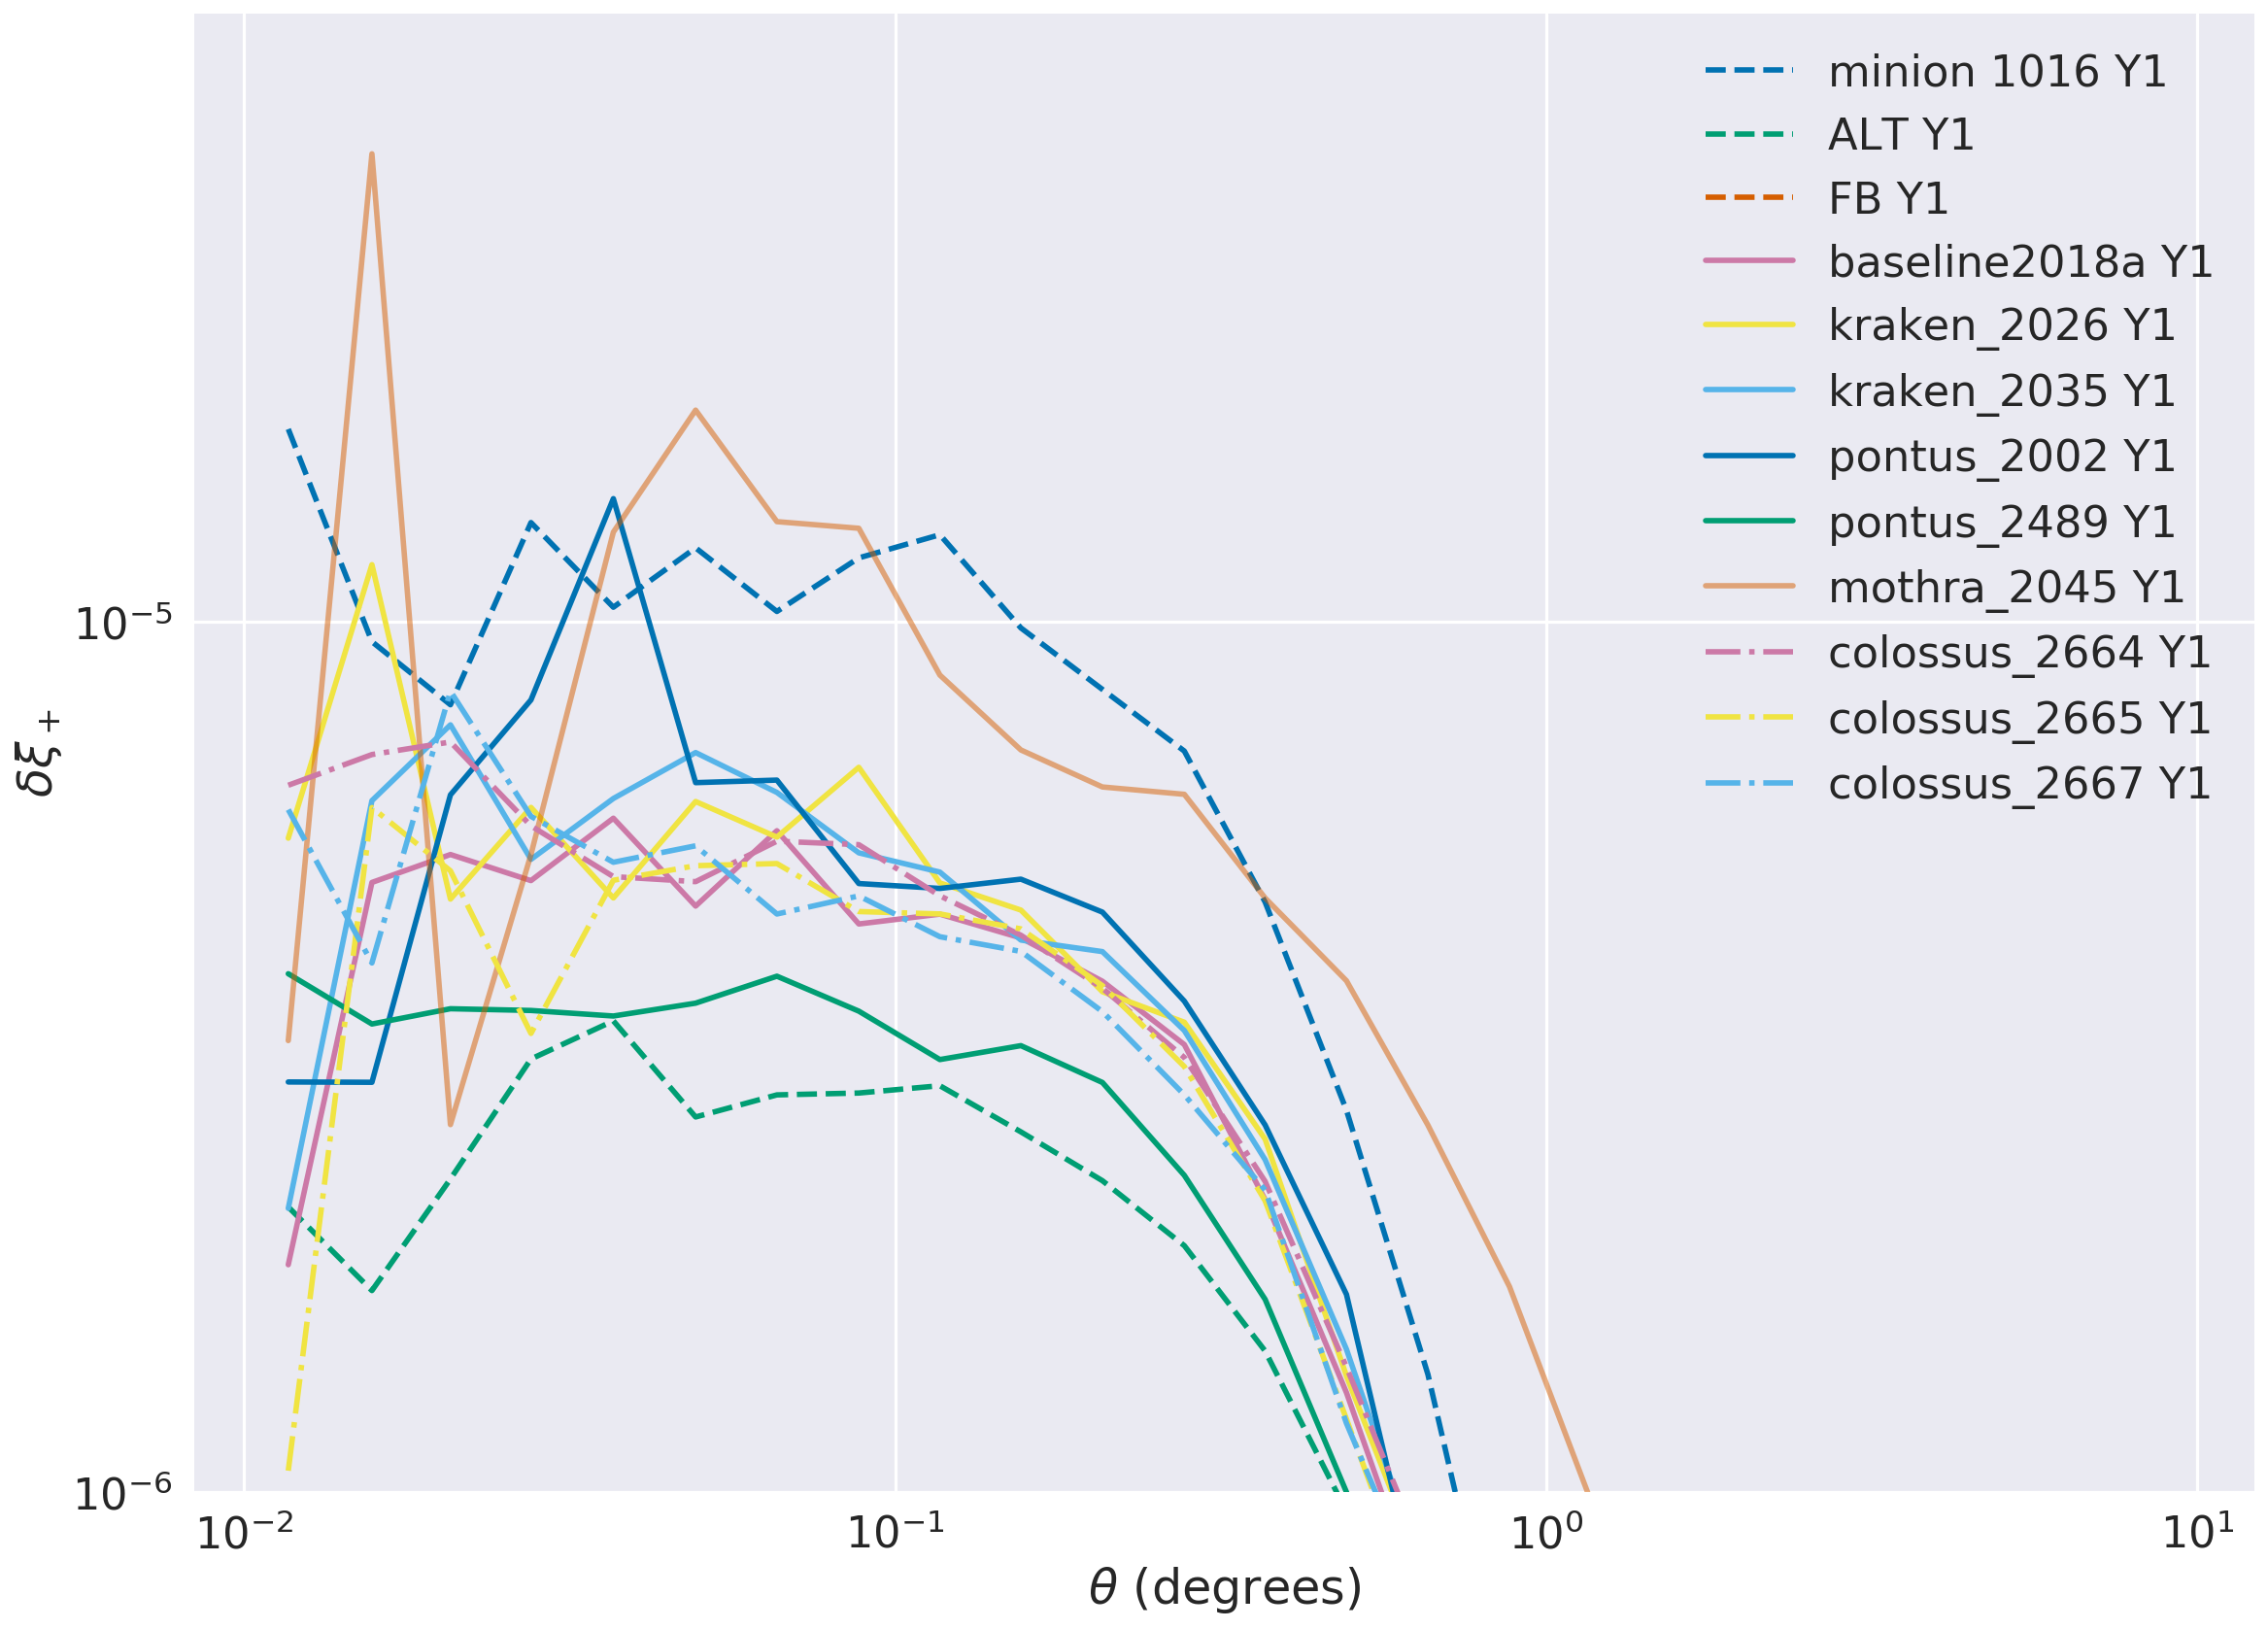

In [14]:
plt.loglog(r, random_y1_delta_xips, '--', label='minion 1016 Y1')
plt.loglog(r, alt_y1_delta_xips, '--', label='ALT Y1')
plt.loglog(r, fb_y1_delta_xips, '--', label='FB Y1')
plt.loglog(r, baseline2018aY1, label='baseline2018a Y1')
plt.loglog(r, kraken_2026Y1, label='kraken_2026 Y1')
plt.loglog(r, kraken_2035Y1, label='kraken_2035 Y1')
plt.loglog(r, pontus_2002Y1, label='pontus_2002 Y1')
plt.loglog(r, pontus_2489Y1, label='pontus_2489 Y1')
plt.loglog(r, mothra_2045Y1, label='mothra_2045 Y1', alpha=0.5)
plt.loglog(r, colossus_2664Y1, '-.', label='colossus_2664 Y1')
plt.loglog(r, colossus_2665Y1, '-.', label='colossus_2665 Y1')
plt.loglog(r, colossus_2667Y1, '-.', label='colossus_2667 Y1')
plt.legend()
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$\delta \xi_+$')
plt.ylim((1e-6,5e-5))

(1e-07, 1e-06)

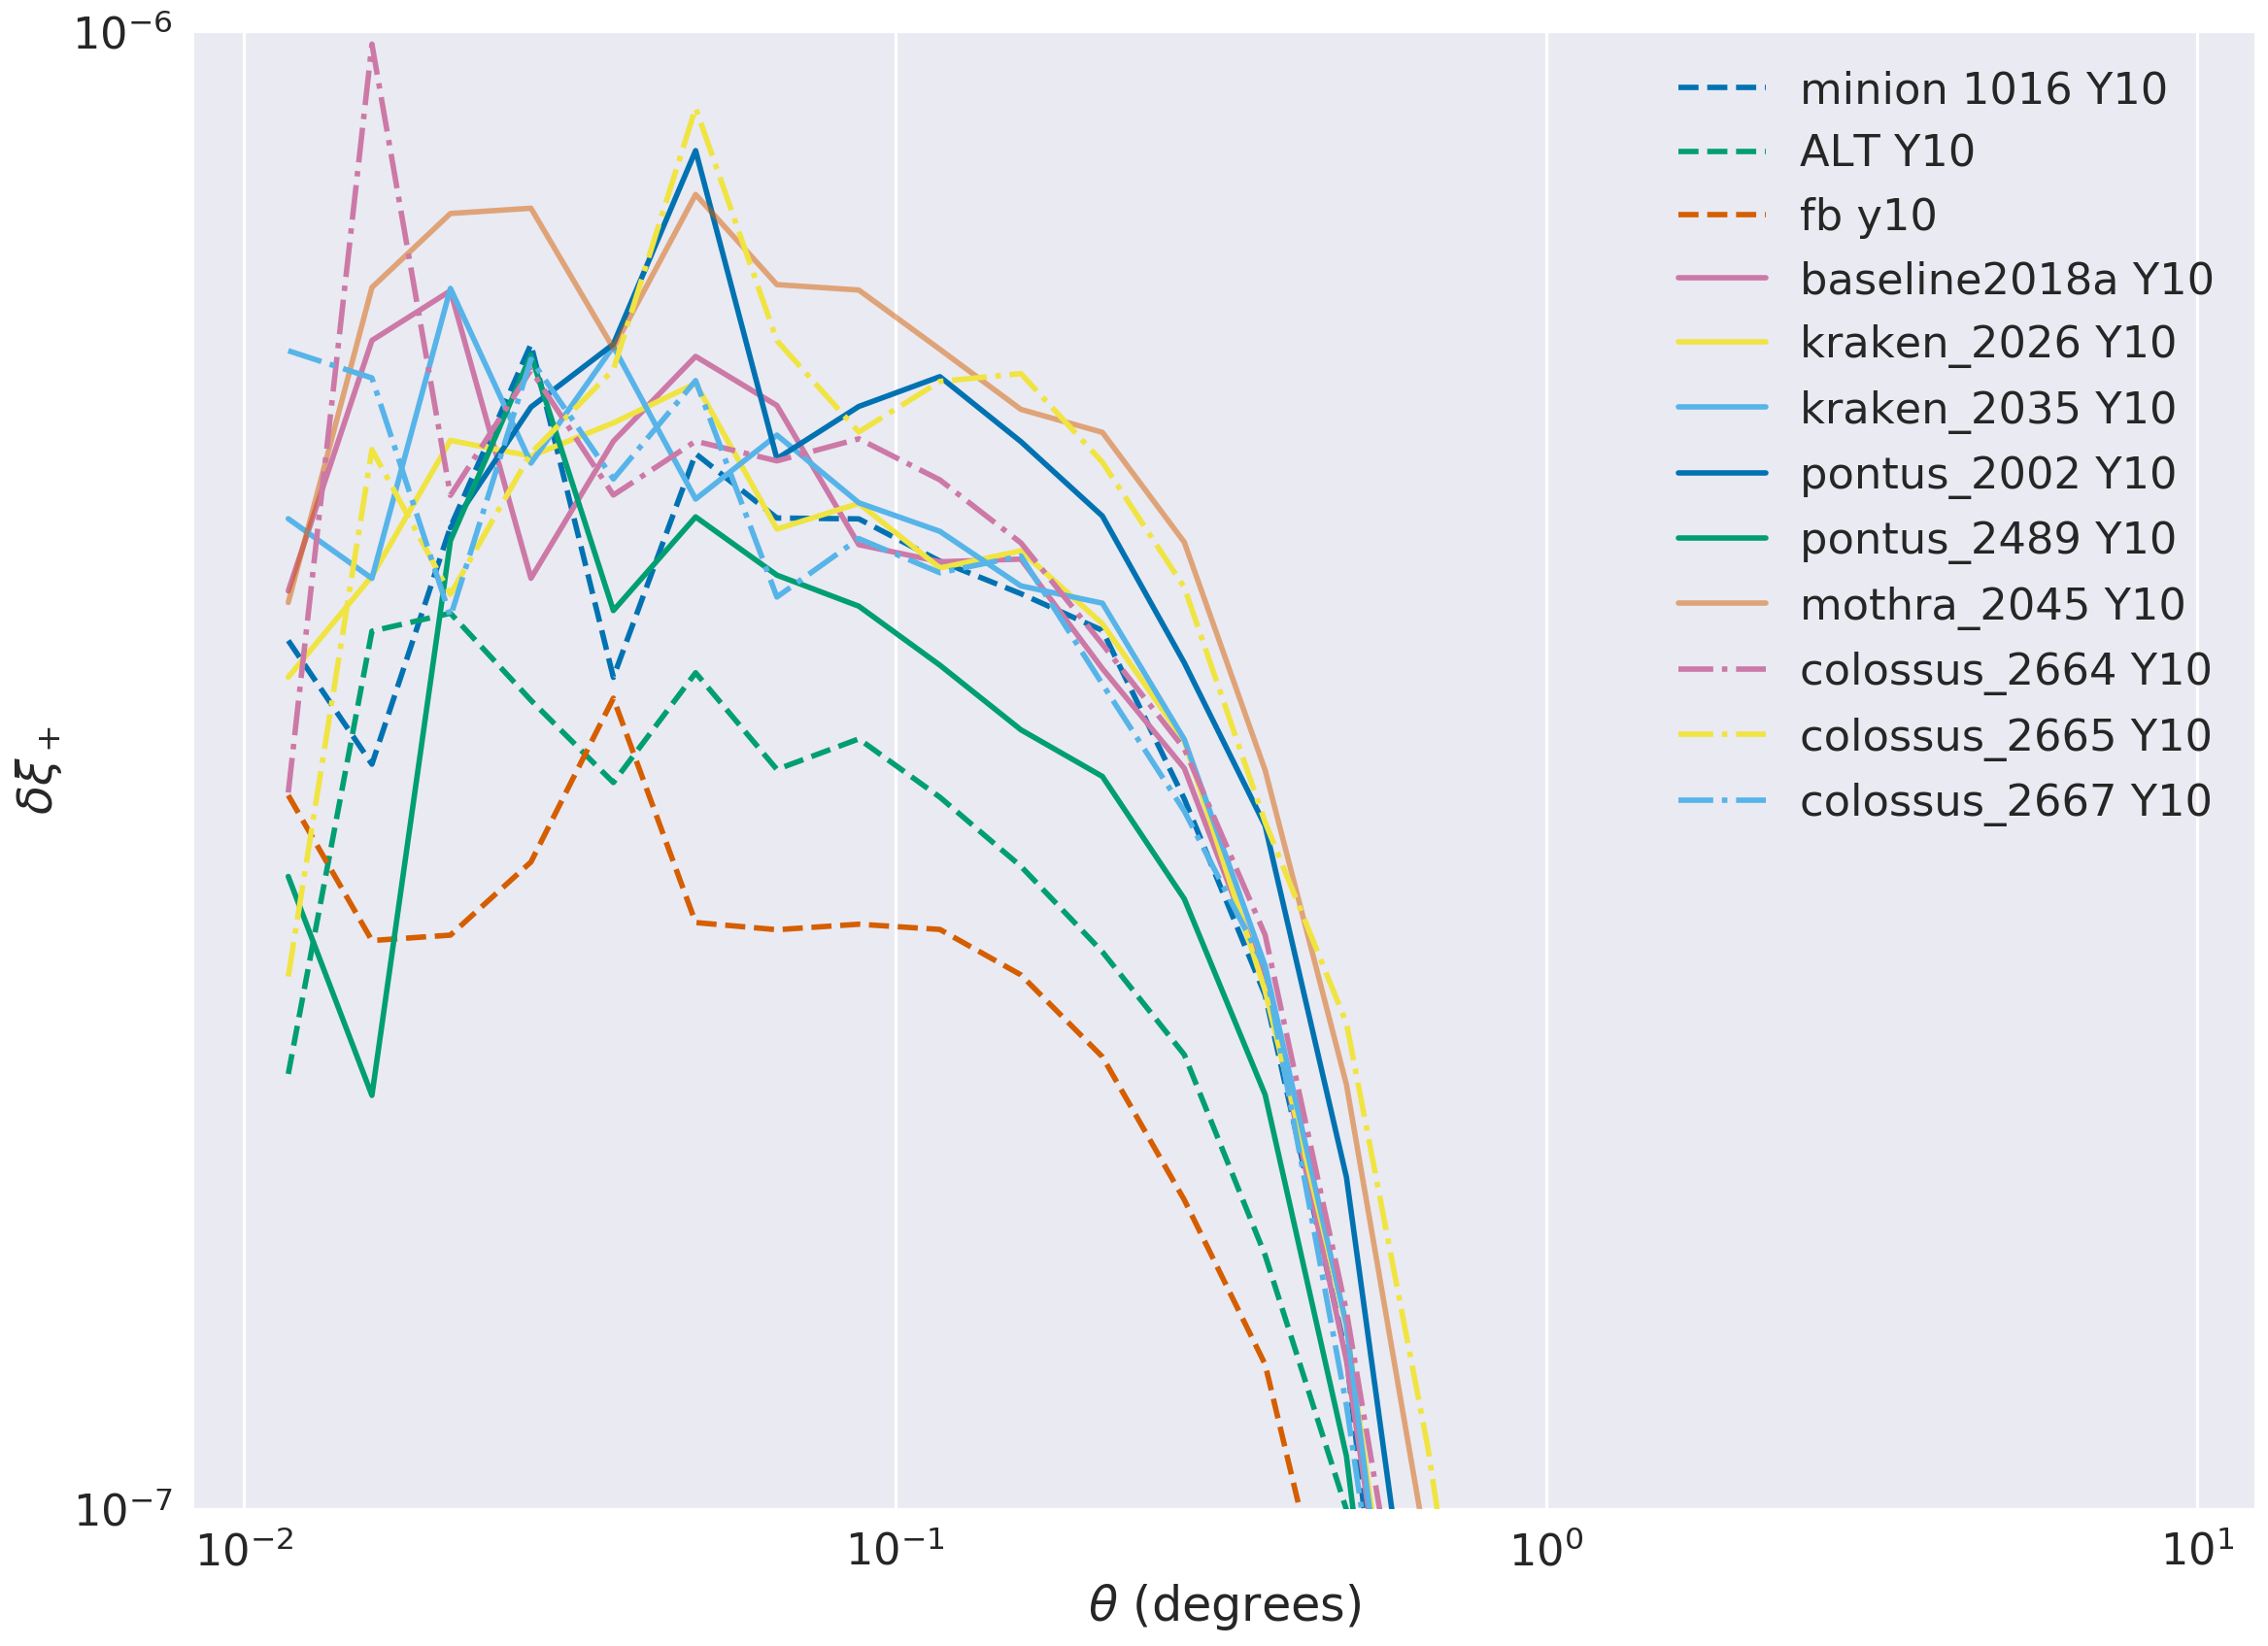

In [13]:
plt.loglog(r, random_y10_delta_xips, '--', label='minion 1016 Y10')
plt.loglog(r, alt_y10_delta_xips, '--', label='ALT Y10')
plt.loglog(r, fb_y10_delta_xips, '--', label='fb y10')
plt.loglog(r, baseline2018aY10, label='baseline2018a Y10')
plt.loglog(r, kraken_2026Y10, label='kraken_2026 Y10')
plt.loglog(r, kraken_2035Y10, label='kraken_2035 Y10')
plt.loglog(r[2:], pontus_2002Y10[2:], label='pontus_2002 Y10')
plt.loglog(r, pontus_2489Y10, label='pontus_2489 Y10')
plt.loglog(r, mothra_2045Y10, label='mothra_2045 Y10', alpha=0.5)
plt.loglog(r, colossus_2664Y10, '-.', label='colossus_2664 Y10')
plt.loglog(r, colossus_2665Y10, '-.', label='colossus_2665 Y10')
plt.loglog(r, colossus_2667Y10, '-.', label='colossus_2667 Y10')
plt.legend()
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$\delta \xi_+$')
plt.ylim((1e-7,1e-6))